# ThinkBayes Practice

Going through the exercises from the book [ThinkBayes](https://greenteapress.com/wp/think-bayes/).

Unfortunately, the book and code examples are written for Python 2, so that's what this Notebook is as well.

#### Link Dump
* [math in markdown](http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/)
* [seaborn distributions](http://seaborn.pydata.org/tutorial/distributions.html)

## Instructions for getting a Python 2 Jupyter Notebook
```
conda create -n py2 python=2 anaconda
conda activate py2
ipython kernel install
```

In [1]:
import sys
sys.path.append('../ThinkBayes/code/')

In [2]:
from __future__ import print_function

### Notes

**Bayes Theorem**

p(A and B) = p(B and A)

p(A and B) = p(A) $\times$ p(B|A)

p(B and A) = P(B) $\times$ p(A|B)

p(B) $\times$ p(A|B) = p(A) $\times$ p(B|A)

p(A|B) = $\frac{p(A)p(B|A)}{p(B)}$

**Diachronic Interpretation**

H = Hypothesis (prior)

D = Data

p(H|D) = $\frac{p(H)p(D|H)}{p(D)}$        

p(D|H) - likelihood

p(H|D) - posterior


# Chapter 4 - More Estimation
## The beta distribution

Why Beta?

**conjugate prior** - if the prior distribution is a beta distribution, the posterior is also a beta distribution. This is useful for making updates with new data.

Beta depends on $\alpha$ and $\beta$ params - an update to the distribution is two simple additions ($\alpha$+h and $\beta$+t) in the case of `heads` and `tails`.

$\alpha$=1 and $\beta$=1 is a uniform distribution from 0 $\to$ 1

In [3]:
import seaborn as sns
import numpy as np
import matplotlib

In [4]:
values = [np.random.beta(1,1) for i in xrange(10000)]

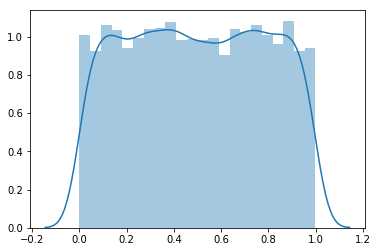

In [5]:
sns.distplot(values)

In [6]:
from thinkbayes import Beta

### Euro Problem

Flipped a Euro, saw 140 Heads and 110 Tails

In [7]:
beta = Beta()
beta.Update((140, 110))
print("Mean: ", beta.Mean())

Mean:  0.559523809524


In [8]:
ax = matplotlib.axes

(0, 1)

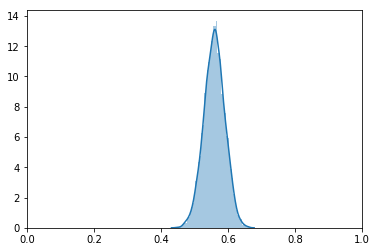

In [9]:
sns.distplot(beta.Sample(10000)).set_xlim(0,1)

# Chapter 5 - Odds and Addends

Odds:   10% = 9:1

In [10]:
import thinkbayes
import thinkplot

In [11]:
class Die(thinkbayes.Pmf):
    def __init__(self, sides):
        thinkbayes.Pmf.__init__(self)
        for x in xrange(1, sides+1):
            self.Set(x, 1)
        self.Normalize()

In [12]:
dice = [Die(6), Die(6), Die(6)]

In [13]:
samples = thinkbayes.SampleSum(dice, 10000)

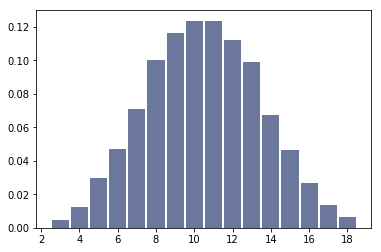

In [14]:
thinkplot.Hist(samples)

{'xscale': 'linear', 'yscale': 'linear'}

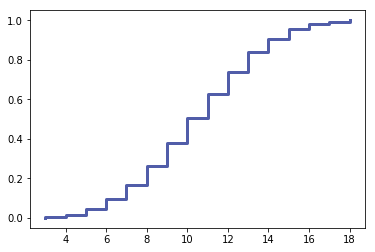

In [15]:
thinkplot.Cdf(samples.MakeCdf())

In [16]:
d6 = Die(6)
d8 = Die(8)

In [17]:
mix = thinkbayes.Pmf()
for die in [d6, d8]:
    for outcome, prob in die.Items():
        mix.Incr(outcome, prob)
mix.Normalize()

1.9999999999999996

In [18]:
pmf_dice = thinkbayes.Pmf()
pmf_dice.Set(Die(4), 5)
pmf_dice.Set(Die(8), 3)
pmf_dice.Normalize()

8

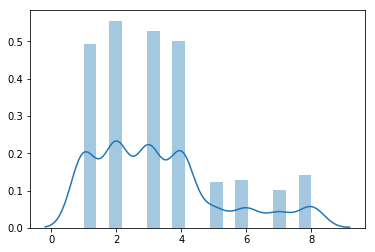

In [19]:
d_values = [pmf_dice.Random().Random() for x in xrange(1000)]
sns.distplot(d_values)

# Chapter 6 - Decision Analysis

In [20]:
import price

In [21]:
pirData = price.ReadData('showcases.2011.csv') #+ price.ReadData('showcases.2012.csv')

In [23]:
pirPmf = thinkbayes.Pmf([x[0] for x in pirData])# + [x[1] for x in pirData])

In [24]:
pirList = [x[0] for x in pirData] + [x[1] for x in pirData]
pirS1 = [x[0] for x in pirData]
pirS2 = [x[1] for x in pirData]

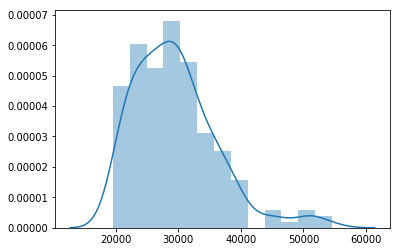

In [25]:
sns.distplot(pirS1)

In [26]:
pirPmf.Mean()

29571.82010582012

### Probability Density Functions

In [27]:
from thinkbayes import GaussianPdf

In [28]:
gauss = GaussianPdf(0, 1)

In [29]:
gauss.Density(0.2)

0.3910426939754559

In [92]:
import scipy.stats as stats
import math

In [31]:
pdf = thinkbayes.EstimatedPdf(pirList)

In [32]:
pmf = pdf.MakePmf(np.linspace(0, 75000, 1001))

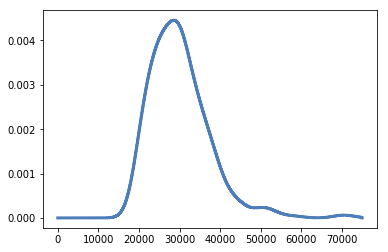

In [33]:
thinkplot.Pmf(pmf)

In [34]:
kde = stats.gaussian_kde(pirList)

In [35]:
pmf.Mean()

30066.785512469156

# Chapter 7 - Prediction

#### Hockey

1. Assume goal scoring is a Poisson process.
2. Assume each team has a long-term goals per game, $\lambda$

##### Strategy
1. Choose a prior for $\lambda$
2. Use score from first 4 games to estimate $\lambda$ for each team
3. Use posterior of $\lambda$ to compute distribution of goals for each team, distribution of goal differential, and prob that each team wins the next time
4. Compute probability that each team wins the series

Avg goals per game: $\mu$ = 2.8 $\sigma$ = 0.3

In [36]:
hockeyPmf = thinkbayes.MakeGaussianPmf(2.8, 0.3, 4, 101)

In [37]:
hockeyPmf.Mean()

2.8000000000000003

#### Poisson
A poisson process is a continuous version of a Bernoulli process (series of trials).
Used to model customers arriving at a store, buses arriving at a stop, goals scored in a hockey game, etc.

In [38]:
thinkbayes.EvalPoissonPmf(3, 2.8)

0.22248374912479738

In [39]:
import hockey

In [40]:
bruins = hockey.Hockey('Bruins')
canucks = hockey.Hockey('Canucks')

In [41]:
bruins.UpdateSet([0,2,8,4])
canucks.UpdateSet([1,3,1,0])

0.0004674811044859316

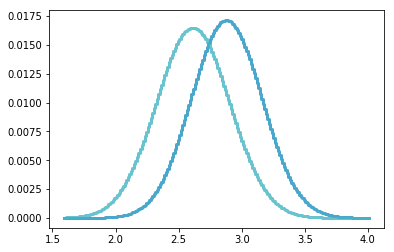

In [42]:
thinkplot.Pmfs([bruins, canucks])

In [43]:
print(bruins.MaximumLikelihood())
print(canucks.MaximumLikelihood())

2.872
2.608


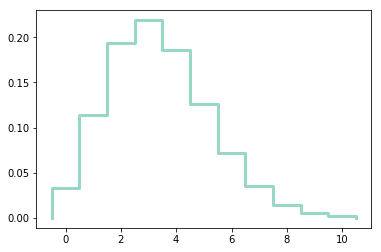

In [44]:
thinkplot.Pmf(thinkbayes.MakePoissonPmf(3.4, 10))

In [45]:
bruins_mix = hockey.MakeGoalPmf(bruins)
canucks_mix = hockey.MakeGoalPmf(canucks)

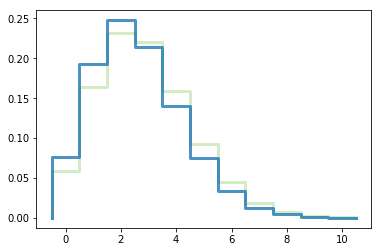

In [46]:
thinkplot.Pmfs([bruins_mix, canucks_mix])

In [47]:
diff = bruins_mix - canucks_mix

In [48]:
print(diff.ProbGreater(0))
print(diff.ProbLess(0))
print(diff.Prob(0))

0.4579964920723547
0.3702934089545195
0.17171009897312495


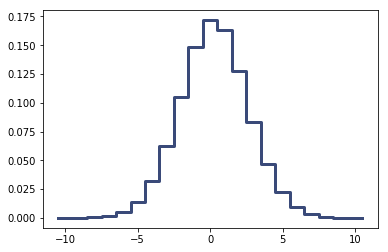

In [49]:
thinkplot.Pmf(diff)

### Sudden Death

We don't have a point estimate for lambda. Instead we have a distribution. So we'll make a mixture of PMFs from these distributions

#### Poisson distribution
[Poisson with Python](https://muthu.co/poisson-distribution-with-python/)

Let's say that on an average day, 25 cars drive on a street.

$\lambda = 25$

The probability of 28 passing can be found with:

$p = \frac{e^{-\lambda} \times \lambda^{x}}{x!}$

$0.0632 = \frac{e^{-25} \times 25^{28}}{28!}$

##### Distribution of time between events
$\lambda \times e^{-\lambda x}$

In [51]:
from scipy.stats import poisson

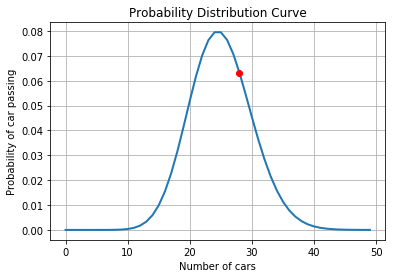

In [71]:
import matplotlib.pyplot as plt
plt.ylabel('Probability of car passing')
plt.xlabel('Number of cars')
plt.title('Probability Distribution Curve')
arr = []
rv = poisson(25)
for num in range(0,50):
 arr.append(rv.pmf(num))
 
prob = rv.pmf(28)
plt.grid(True)
plt.plot(arr, linewidth=2.0)
plt.plot([28], [prob], marker='o', markersize=6, color="red")
plt.show()

In [72]:
sum([rv.pmf(i) for i in range(0,50)])

0.9999930466947488

In [75]:
tbRoadPmf = thinkbayes.MakePoissonPmf(25, 50)

In [77]:
tbRoadPmf.Prob(28)

0.06321480874286167

In [115]:
2*math.exp(-2 * 2)

0.03663127777746836

## Poisson Meteors

[Towards Data Science - Poisson](https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459)

In [122]:
# Chances of seeing 3 meteors in a period, when average for a period is 5
poisson(5).pmf(3)

0.1403738958142805

### Interarrival time - time between events

Probability of waiting more than $t$ minutes

$P(T > t) = e^{-\lambda t}$

In [130]:
# Probability of waiting more than 6 minutes (6/60) when rate is 5 meteors every 60 minutes.
math.exp(-5*0.1)

0.6065306597126334

In [131]:
math.exp(-5*(12./60))

0.36787944117144233

## Waiting Time Paradox 
[The Waiting Time Paradox, or, Why Is My Bus Always Late?](http://jakevdp.github.io/blog/2018/09/13/waiting-time-paradox/)

The average wait time is the same as the average arrival time!
```
When waiting for a bus that comes on average every 10 minutes, your average waiting time will be 10 minutes.
```

## Weibull distribution
- useful for failure rates
* A value of $k < 1$ indicates that the failure rate decreases over time
* A value of $k = 1$ indicates that the failure rate is constant over time.
* A value of $k > 1$ indicates that the failure rate increases with time.